In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import itertools
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist
np.set_printoptions(suppress=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # **K-Means Clustering (3 Marks)**

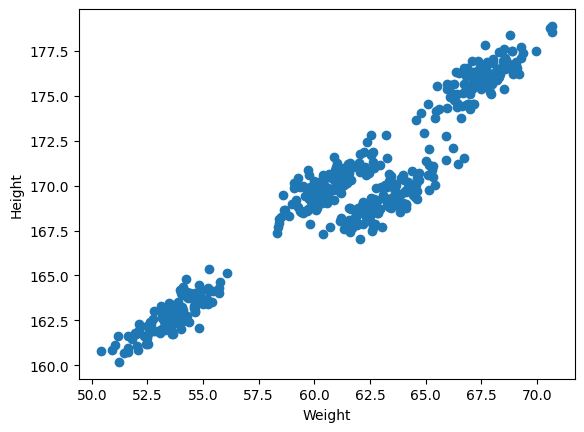

In [10]:
# read the given dataset
data = pd.read_csv("BMI_Data.csv")
data
# Plot the scatter plot of the data points.
plt.xlabel("Weight")
plt.ylabel("Height")
plt.scatter(data["Weight"] , data["Height"])
plt.show()


In [126]:
#Write your code for K-Means and Inertia
def inertia(p1 , p2):
   return np.sqrt(np.sum((p1 - p2)**2))
k = 3
mt = np.zeros(( data.size , k))
def kmeans(data , k):
  global mt
  random_centers = data.sample(k)
  m = len(random_centers)
  rc = np.array(random_centers)

  for n in range(data.size):
    for nn in range(m):
      d1 = inertia(rc[nn] , n)
      mt[n][nn] = d1




kmeans(data , 3)
print(mt)


[[ 170.43413428  180.81350503  188.82869006]
 [ 169.17129816  179.53797338  187.53690057]
 [ 167.91087551  178.26453424  186.24688981]
 ...
 [1259.95729502 1249.18242281 1239.73937438]
 [1261.36890689 1250.59389322 1241.15088981]
 [1262.78052458 1252.00536981 1242.56241137]]


In [127]:
for i in range(0 , 1000):
  max = mt[i][np.argmax(mt[i])]
  for j in range(0 , 3):
    if mt[i][j] == max:
      mt[i][j] = 1
    else :
      mt[i][j] = 0
print(mt)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [130]:
for k in range(0 , 1000) :
  for l in range(0 , 3) :
    if mt[k][l] == 1:
      sum_height = data["height"][k]
      print(sum_height)

KeyError: ignored

In [104]:
mt[0]

array([  1.        , 178.168854  , 180.28625061])

In [ ]:
# optimize hyperparameters k_clusters using elbow method.


In [ ]:
# Write explanation for choosing a particular number of cluster value


In [124]:
# Perform K-Means clustering Algorithm on the BMI_Data for optimal K value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3 , max_iter = 200 , n_init = 20 , random_state= 0)
labels = km .fit_predict(data)
cluster = km.fit_transform(data)
print(labels)
print(cluster)

[0 0 2 2 0 2 2 2 2 1 2 0 2 1 2 2 0 2 1 2 2 0 2 1 2 1 0 2 1 2 2 2 0 2 2 0 1
 2 1 0 1 2 2 0 2 0 2 2 0 0 1 1 0 2 2 2 2 1 1 0 0 1 0 0 0 2 2 0 2 2 1 2 1 0
 1 0 2 2 2 2 1 2 1 2 2 2 1 1 0 1 1 1 0 1 2 2 0 0 0 2 1 1 0 1 2 2 2 0 2 1 1
 2 1 1 0 1 0 2 2 0 2 1 0 0 1 0 0 0 0 1 2 1 2 1 1 1 2 0 2 2 0 0 0 0 2 1 2 2
 2 1 1 0 2 2 2 2 2 0 2 2 0 2 0 0 2 2 0 2 1 2 0 1 0 2 2 1 2 1 1 1 0 0 0 2 2
 1 2 0 2 1 0 2 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 0 2 0 0 0 2 0 2 1 1 1 2 0
 2 1 2 0 1 2 1 2 2 2 2 2 2 2 2 2 1 0 0 2 2 0 1 1 2 0 2 2 2 2 0 1 2 1 1 2 1
 2 2 2 0 1 0 0 2 2 1 0 2 1 0 2 0 1 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 1 1 0 1
 1 1 2 0 0 1 2 1 0 0 2 1 1 2 1 2 0 2 1 2 1 2 2 2 2 2 2 2 1 0 2 2 1 0 2 2 0
 0 2 0 2 2 2 2 1 0 0 2 0 2 0 0 0 0 2 0 2 0 2 2 1 0 2 1 1 2 2 0 0 2 2 0 2 1
 2 2 2 1 2 2 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 1 0 1 0 2 0 1 2 0 2 0 2 2 2 1
 2 1 2 2 0 1 2 2 0 1 2 2 2 0 2 0 2 0 2 0 1 2 0 1 0 2 2 2 2 0 1 2 2 2 0 0 2
 2 2 2 2 1 0 2 0 1 2 2 2 1 2 2 1 2 2 2 2 0 2 1 0 2 0 2 0 2 1 2 1 2 1 2 1 2
 2 2 1 2 2 2 1 0 2 2 1 2 

AttributeError: ignored

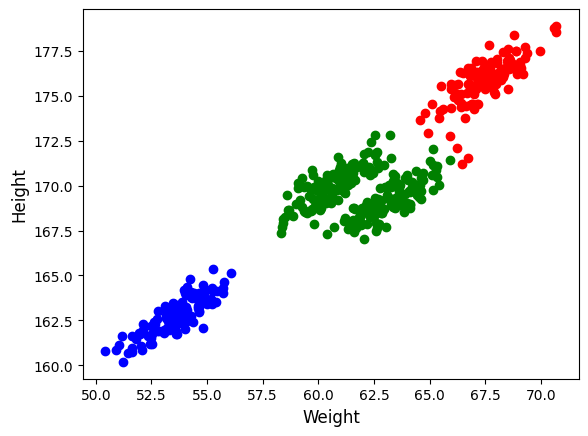

In [125]:
# plot the clusters
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Height', fontsize=12)

plt.scatter(data[labels == 0]['Weight'], data[labels == 0]['Height'], c = "red")
plt.scatter(data[labels == 1]['Weight'], data[labels == 1]['Height'], c = "blue")
plt.scatter(data[labels == 2]['Weight'], data[labels == 2]['Height'], c = "green")

kMeansCentroids = kmeans.cluster_centers_

plt.scatter(kMeansCentroids[0][0], kMeansCentroids[0][1], c = "orange", marker="*")
plt.scatter(kMeansCentroids[1][0], kMeansCentroids[1][1], c = "yellow", marker="*")
plt.scatter(kMeansCentroids[2][0], kMeansCentroids[2][1], c = "black", marker="*")

location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3", "Centroid 1", "Centroid 2", "Centroid 3"], loc=0, frameon=legend_drawn_flag)

plt.show()

# **Hierarchical Agglomerative Clustering (2 Marks)**

In [27]:
# Implement the Hierarchical Agglomerative Clustering using sklearn library

# read the given dataset
cs_data = pd.read_csv("/content/Customer_Segmentation_Data.csv")

# size of dataset
data_size = cs_data.size

# number of datapoints(N)


# first five data points of dataset
cs_data
sample = cs_data.sample(100)
sample

,Unnamed: 0,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
648,648,0.0,0.0,0.344828,0.333333,0.298221,0.5,0.5
1701,1701,1.0,0.0,0.051724,0.000000,0.116246,0.0,0.0
1957,1957,0.0,0.0,0.362069,0.333333,0.211025,0.0,0.0
880,880,0.0,0.0,0.344828,0.333333,0.583098,1.0,1.0
1884,1884,1.0,1.0,0.034483,0.333333,0.202335,0.0,0.0
...,...,...,...,...,...,...,...,...
1599,1599,1.0,1.0,0.310345,0.333333,0.250073,0.5,0.5
503,503,0.0,0.0,0.344828,0.333333,0.324112,0.5,0.0
1114,1114,0.0,1.0,0.155172,0.333333,0.530497,1.0,0.5
1291,1291,0.0,0.0,0.482759,0.333333,0.229180,0.5,1.0


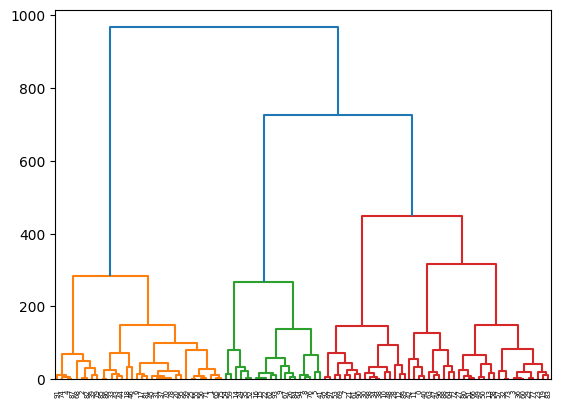

In [42]:
"""
Reference Documentation for linkage- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
Reference Documentation for dendogram- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
"""
# create the dendograms using average linkage for the preprocessed_customer_segmentation.csv dataset
ytdist = sample

Z = linkage(ytdist, "average")
plt.figure()
dn = dendrogram(Z)

# Write your code here

In [ ]:
# Write all the informations provided by the dendogram and how to get the optimal cluster value from dendogram
#From the dendogram we can see that at the height of 100 we get 13 clusters
#at the height of 200 - 600 we get 3 clusters as we can see orange and green clusters are similar to each other and part of red cluster is similar to orange and green clusters.
#hence we conclude 3 is the optimal clusters.

In [53]:
#perform Hierarchical Agglomerative Clustering on the new data
clustering = AgglomerativeClustering().fit(sample)
clustering

AgglomerativeClustering()

In [60]:
print("The number of clusters found by the algorithm : ", clustering.n_clusters)
print("Cluster labels for each point :", clustering.labels_)
print("Number of leaves in the hierarchical tree: " , clustering.n_leaves_)
print("The estimated number of connected components in the graph;" , clustering.n_connected_components_)
print("Number of features seen during fit.", clustering.n_features_in_)

The number of clusters found by the algorithm :  2
Cluster labels for each point : [0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1]
Number of leaves in the hierarchical tree:  100
The estimated number of connected components in the graph; 1
Number of features seen during fit. 8
